In [63]:
import numpy as np
import pandas as pd
import scanpy as sc
import anndata
import os 
from IPython.core.debugger import set_trace
from pathlib import Path
proj_dir = Path("/dataVolume/storage/single_cell_projects/eye_integration_reprex")

In [2]:
sc.settings.set_figure_params(dpi=80)

sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_versions()

scanpy==1.4+189.g9cff5a7 anndata==0.6.21 numpy==1.16.4 scipy==1.2.1 pandas==0.24.1 scikit-learn==0.20.2 statsmodels==0.9.0 python-igraph==0.7.1 louvain==0.6.1 


In [3]:
anndata_dir = proj_dir / "data"

anndata_dir

PosixPath('/dataVolume/storage/single_cell_projects/resources/clark_10x_mouse_proj/data')

In [4]:
adata = sc.read_mtx(anndata_dir / "matrix.mtx")
adata = adata.transpose()

In [5]:
barcodes = pd.read_csv(anndata_dir / "barcodes.tsv", sep = "\t")
genes = pd.read_csv(anndata_dir / "genes.tsv", sep = "\t")

In [6]:
genes.index = genes.gene_short_name

In [7]:
adata.obs = barcodes
adata.var = genes

In [8]:
adata.write(anndata_dir / "anndata.h5ad")

... storing 'sample' as categorical
... storing 'age' as categorical
... storing 'CellType' as categorical
... storing 'new_CellType' as categorical
... storing 'umap_CellType' as categorical
... storing 'gene_short_name' as categorical


In [9]:
anndata_path = anndata_dir / "anndata.h5ad"

adata = anndata.read_h5ad(anndata_path)

Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [10]:
adata.var_names_make_unique(join="-")

## preprocessing

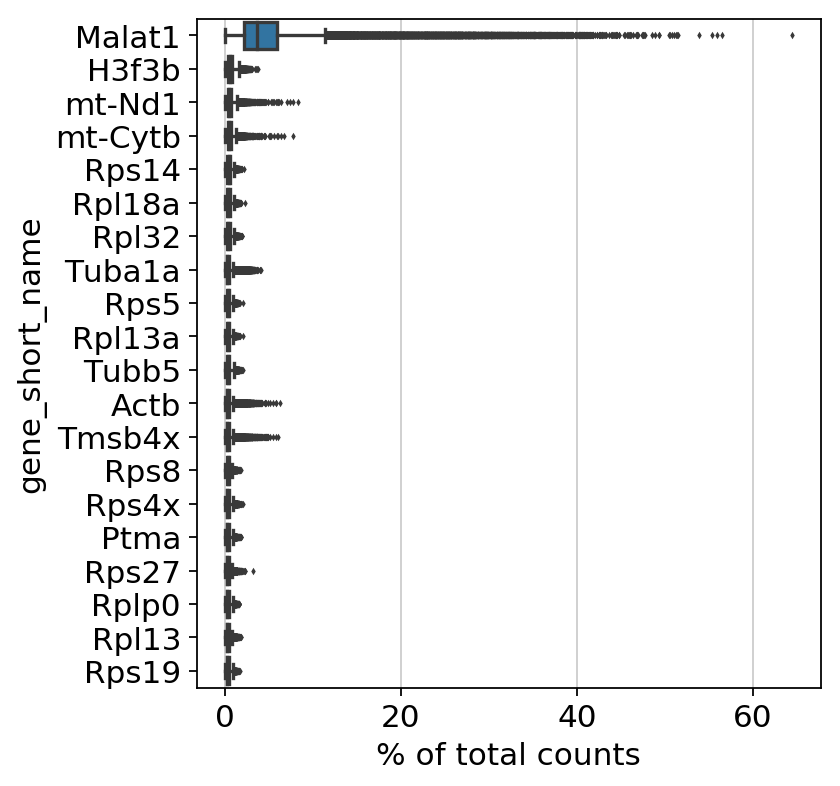

In [11]:

sc.pl.highest_expr_genes(adata, n_top=20, gene_symbols = "gene_short_name")

## basic filtering

In [12]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

filtered out 4193 cells that have less than 200 genes expressed
filtered out 8688 genes that are detected in less than 3 cells


In [ ]:
adata.obs

## compute fraction mito genes

In [ ]:
mito_genes = adata.var.gene_short_name.str.startswith('mt-')
mito_genes

In [15]:
# for each cell compute fraction of counts in mito genes vs. all genes
# the `.A1` is only necessary as X is sparse (to transform to a dense array after summing)
adata.obs['percent_mito'] = np.sum(
    adata[:, mito_genes].X, axis=1).A1 / np.sum(adata.X, axis=1).A1
# add the total counts per cell as observations-annotation to adata
adata.obs['n_counts'] = adata.X.sum(axis=1).A1

## plot qc

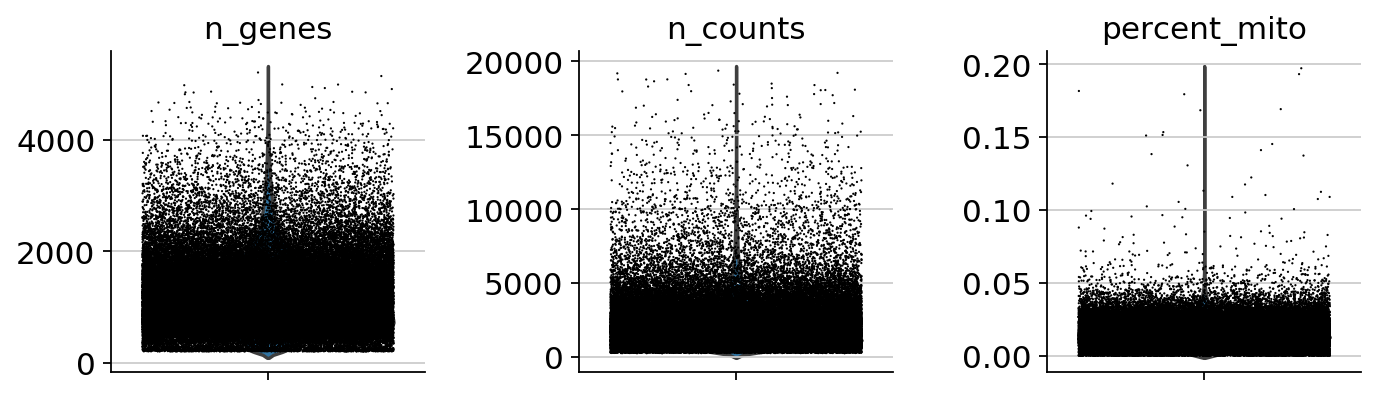

In [16]:
sc.pl.violin(adata, ['n_genes', 'n_counts', 'percent_mito'],
             jitter=0.4, multi_panel=True)

/usr/local/bin/TOOLS/scanpy/scanpy/plotting/_anndata.py:311: DeprecationWarning: Use obs_vector instead of _get_obs_array, _get_obs_array will be removed in the future.
  x_arr = adata._get_obs_array(x, use_raw=use_raw, layer=layers[0])
/opt/miniconda3/lib/python3.6/site-packages/anndata/base.py:1618: FutureWarning: In a future version of AnnData, access to `.X` by passing `layer='X'` will be removed. Instead pass `layer=None`.
  FutureWarning
/usr/local/bin/TOOLS/scanpy/scanpy/plotting/_anndata.py:312: DeprecationWarning: Use obs_vector instead of _get_obs_array, _get_obs_array will be removed in the future.
  y_arr = adata._get_obs_array(y, use_raw=use_raw, layer=layers[1])
/opt/miniconda3/lib/python3.6/site-packages/anndata/base.py:1618: FutureWarning: In a future version of AnnData, access to `.X` by passing `layer='X'` will be removed. Instead pass `layer=None`.
  FutureWarning


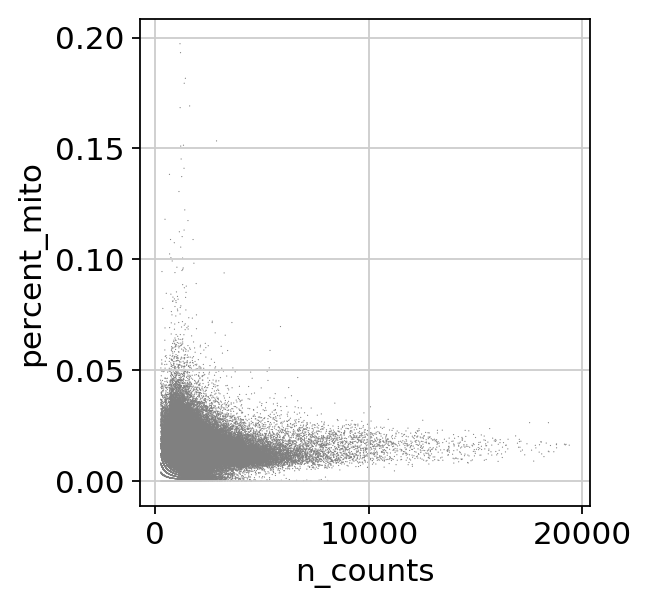

/usr/local/bin/TOOLS/scanpy/scanpy/plotting/_anndata.py:311: DeprecationWarning: Use obs_vector instead of _get_obs_array, _get_obs_array will be removed in the future.
  x_arr = adata._get_obs_array(x, use_raw=use_raw, layer=layers[0])
/opt/miniconda3/lib/python3.6/site-packages/anndata/base.py:1618: FutureWarning: In a future version of AnnData, access to `.X` by passing `layer='X'` will be removed. Instead pass `layer=None`.
  FutureWarning
/usr/local/bin/TOOLS/scanpy/scanpy/plotting/_anndata.py:312: DeprecationWarning: Use obs_vector instead of _get_obs_array, _get_obs_array will be removed in the future.
  y_arr = adata._get_obs_array(y, use_raw=use_raw, layer=layers[1])
/opt/miniconda3/lib/python3.6/site-packages/anndata/base.py:1618: FutureWarning: In a future version of AnnData, access to `.X` by passing `layer='X'` will be removed. Instead pass `layer=None`.
  FutureWarning


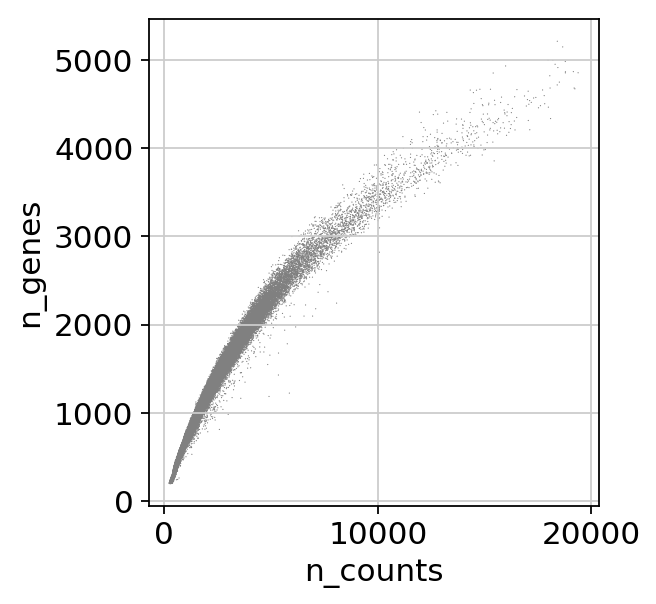

In [17]:
sc.pl.scatter(adata, x='n_counts', y='percent_mito')
sc.pl.scatter(adata, x='n_counts', y='n_genes')

/usr/local/bin/TOOLS/scanpy/scanpy/plotting/_anndata.py:311: DeprecationWarning: Use obs_vector instead of _get_obs_array, _get_obs_array will be removed in the future.
  x_arr = adata._get_obs_array(x, use_raw=use_raw, layer=layers[0])
/opt/miniconda3/lib/python3.6/site-packages/anndata/base.py:1618: FutureWarning: In a future version of AnnData, access to `.X` by passing `layer='X'` will be removed. Instead pass `layer=None`.
  FutureWarning
/usr/local/bin/TOOLS/scanpy/scanpy/plotting/_anndata.py:312: DeprecationWarning: Use obs_vector instead of _get_obs_array, _get_obs_array will be removed in the future.
  y_arr = adata._get_obs_array(y, use_raw=use_raw, layer=layers[1])
/opt/miniconda3/lib/python3.6/site-packages/anndata/base.py:1618: FutureWarning: In a future version of AnnData, access to `.X` by passing `layer='X'` will be removed. Instead pass `layer=None`.
  FutureWarning


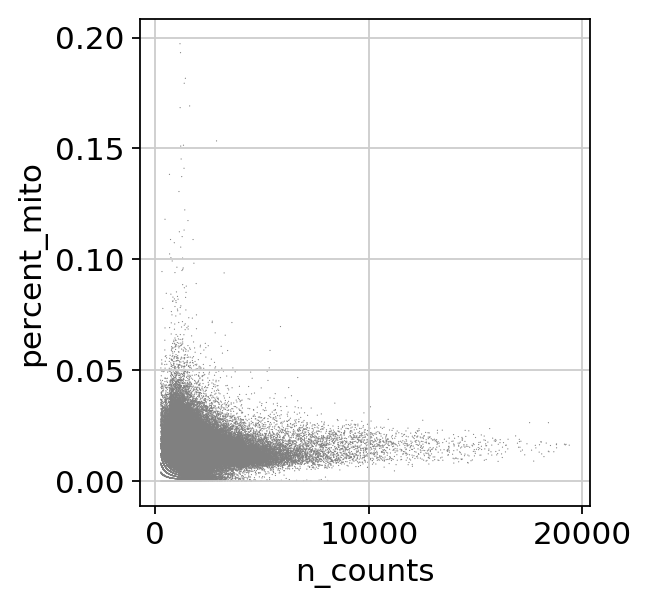

/usr/local/bin/TOOLS/scanpy/scanpy/plotting/_anndata.py:311: DeprecationWarning: Use obs_vector instead of _get_obs_array, _get_obs_array will be removed in the future.
  x_arr = adata._get_obs_array(x, use_raw=use_raw, layer=layers[0])
/opt/miniconda3/lib/python3.6/site-packages/anndata/base.py:1618: FutureWarning: In a future version of AnnData, access to `.X` by passing `layer='X'` will be removed. Instead pass `layer=None`.
  FutureWarning
/usr/local/bin/TOOLS/scanpy/scanpy/plotting/_anndata.py:312: DeprecationWarning: Use obs_vector instead of _get_obs_array, _get_obs_array will be removed in the future.
  y_arr = adata._get_obs_array(y, use_raw=use_raw, layer=layers[1])
/opt/miniconda3/lib/python3.6/site-packages/anndata/base.py:1618: FutureWarning: In a future version of AnnData, access to `.X` by passing `layer='X'` will be removed. Instead pass `layer=None`.
  FutureWarning


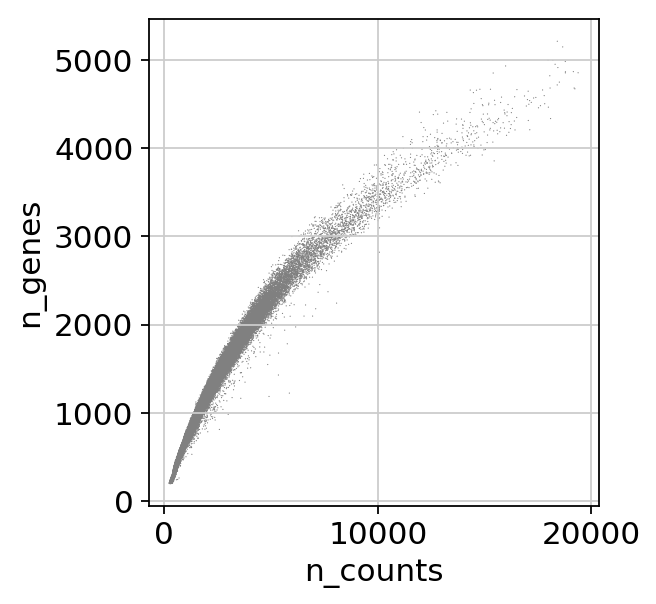

In [18]:
sc.pl.scatter(adata, x='n_counts', y='percent_mito')
sc.pl.scatter(adata, x='n_counts', y='n_genes')

## Filter by fewer than 4000 genes and less than 5% mitochondrial expression

In [19]:
adata = adata[adata.obs['n_genes'] < 4000, :]
adata = adata[adata.obs['percent_mito'] < 0.05, :]

## Normalize the data matrix to 10,000 reads per cell, so that counts become comparable among cells.

In [20]:
sc.pp.normalize_per_cell(adata, counts_per_cell_after=1e4)

Trying to set attribute `.obs` of view, making a copy.


## log transform data

In [21]:

sc.pp.log1p(adata)



### Set the .raw attribute of AnnData object to the logarithmized raw gene expression for later use in differential testing and visualizations of gene expression. 

In [22]:

adata.raw = adata

## identify highly variable genes

In [23]:

sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)



--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


In [24]:
## plot highly variable genes

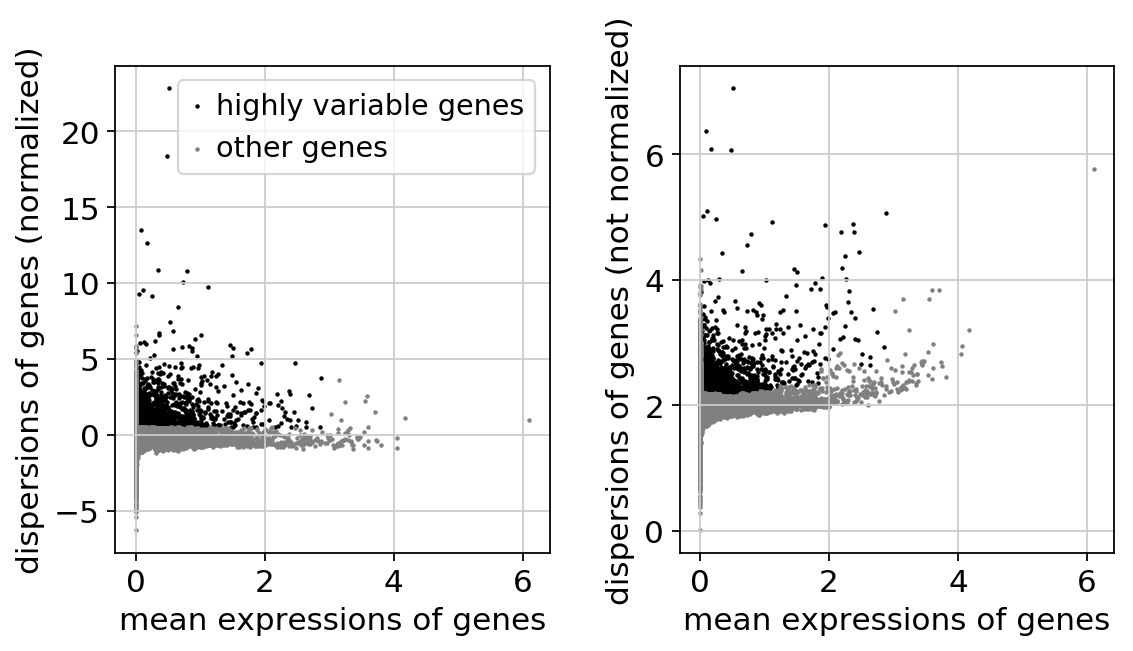

In [25]:
sc.pl.highly_variable_genes(adata)

In [26]:
## filter by highly varaible genes

In [27]:
adata = adata[:, adata.var['highly_variable']]

In [28]:
## regress out library size difference and mito percent

In [29]:
# skip due to memory issues
# sc.pp.regress_out(adata, ['n_counts', 'percent_mito'])

In [30]:
## scale each gene to unit variance; clip values exceeding deviation 10

In [31]:
sc.pp.scale(adata, max_value=10)

In [32]:
## run PCA

In [33]:
sc.tl.pca(adata, svd_solver='arpack')

In [34]:
## plot PCA

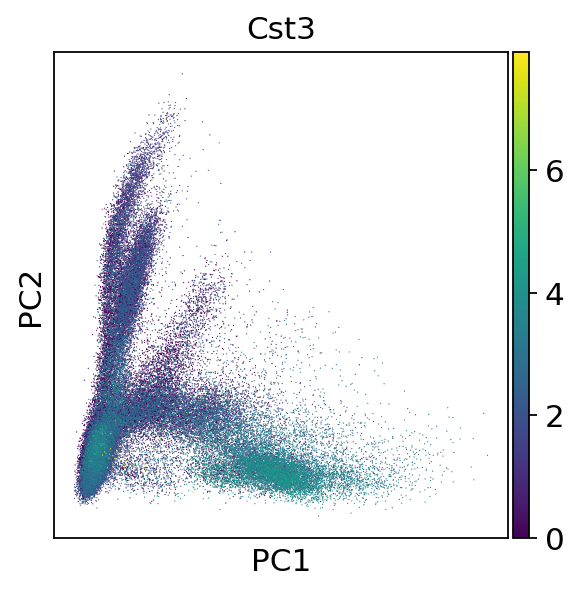

In [35]:
sc.pl.pca(adata, color='Cst3', gene_symbols = "gene_short_name")

In [36]:
## plot pc variance scree plot

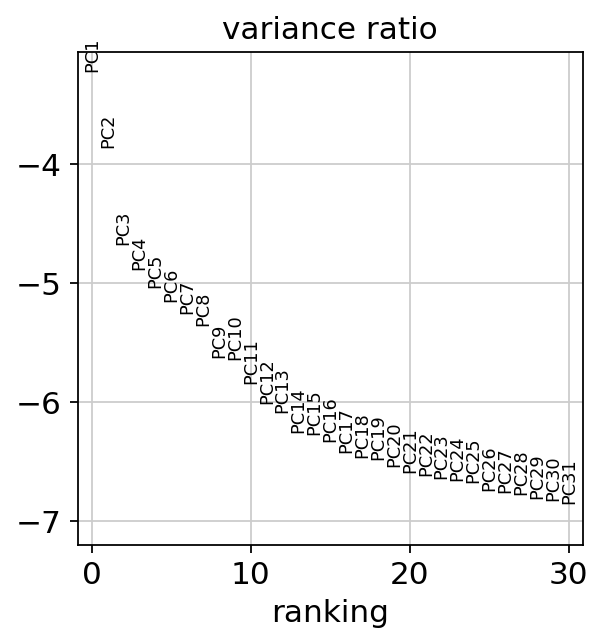

In [37]:
sc.pl.pca_variance_ratio(adata, log=True)

In [38]:
# save preprocessed adata

In [39]:
preprocessed_adata_path = anndata_dir / "anndata_preprocessed.h5ad"

adata.write(preprocessed_adata_path)



In [40]:
preprocessed_adata_path = anndata_dir / "anndata_preprocessed.h5ad"
adata = anndata.read(preprocessed_adata_path)

In [ ]:
adata.obs

In [42]:
## compute the neighborhood graph

In [43]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)

computing neighbors
    using 'X_pca' with n_pcs = 40
    finished (0:00:17.85) --> added to `.uns['neighbors']`
    'distances', distances for each pair of neighbors
    'connectivities', weighted adjacency matrix


In [44]:
## embed neighborhood graph with umap

In [45]:
sc.tl.umap(adata)

computing UMAP
    finished (0:01:23.90) --> added
    'X_umap', UMAP coordinates (adata.obsm)


In [46]:
## plot uncorrected, "raw" expression of a few genes in umap space

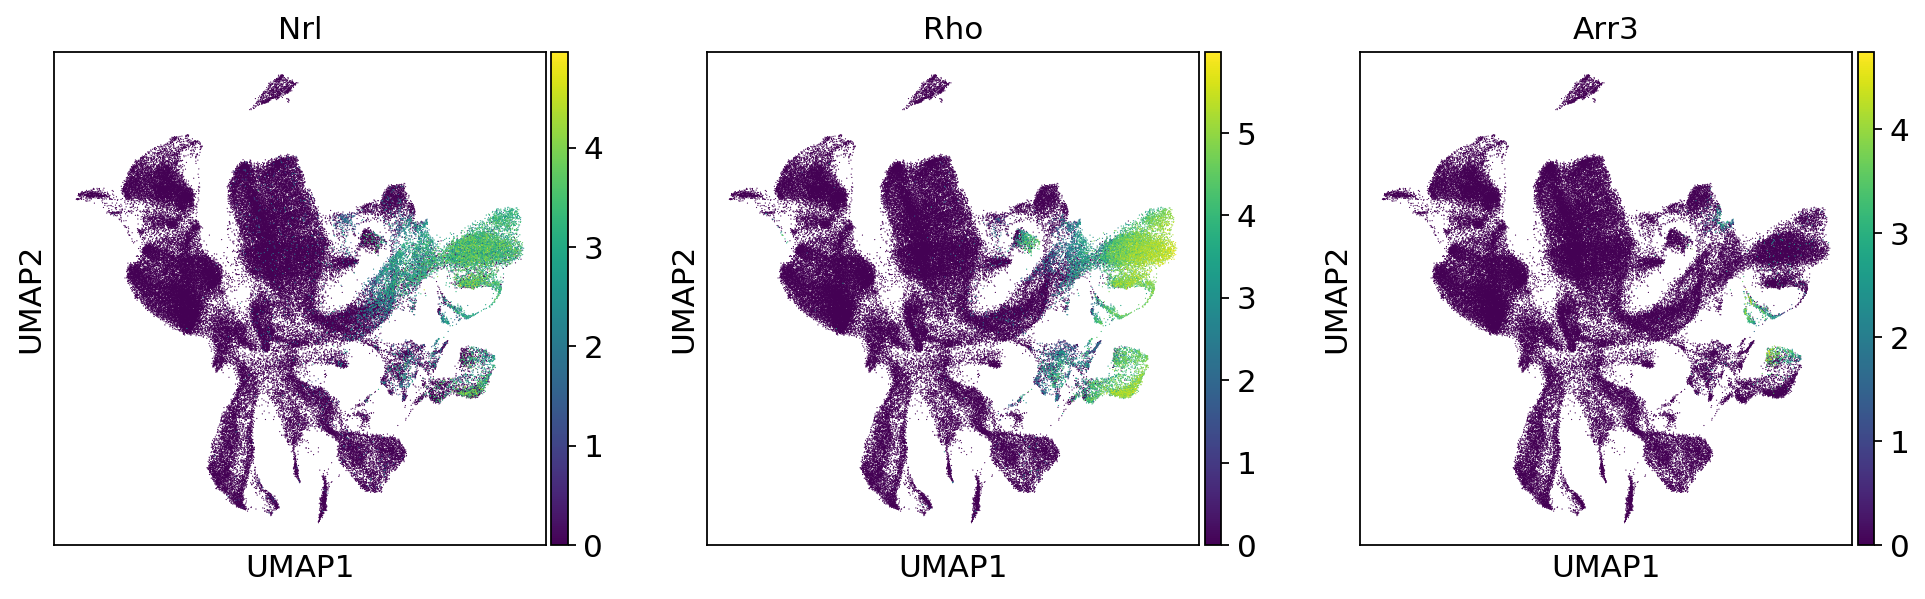

In [47]:
sc.pl.umap(adata, color=['Nrl', 'Rho', 'Arr3'], gene_symbols = "gene_short_name")

In [48]:
## plot corrected, normalized expression of a few genes in umap space

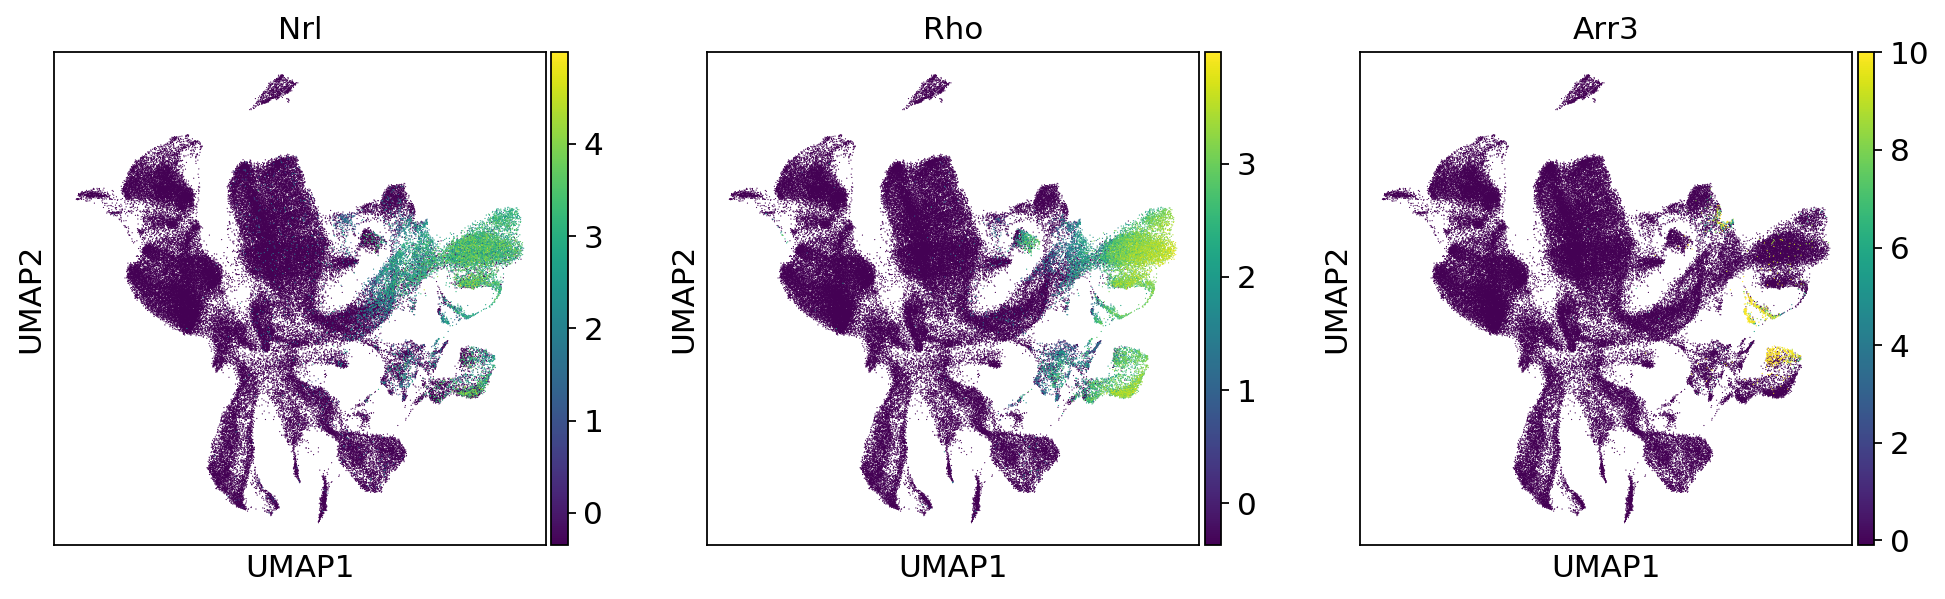

In [49]:
sc.pl.umap(adata, color=['Nrl', 'Rho', 'Arr3'], gene_symbols = "gene_short_name", use_raw = False)

In [50]:
## run louvain clustering 

In [51]:
sc.tl.louvain(adata)

running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished (0:00:12.59) --> found 28 clusters and added
    'louvain', the cluster labels (adata.obs, categorical)


In [52]:
## plot louvain clusters

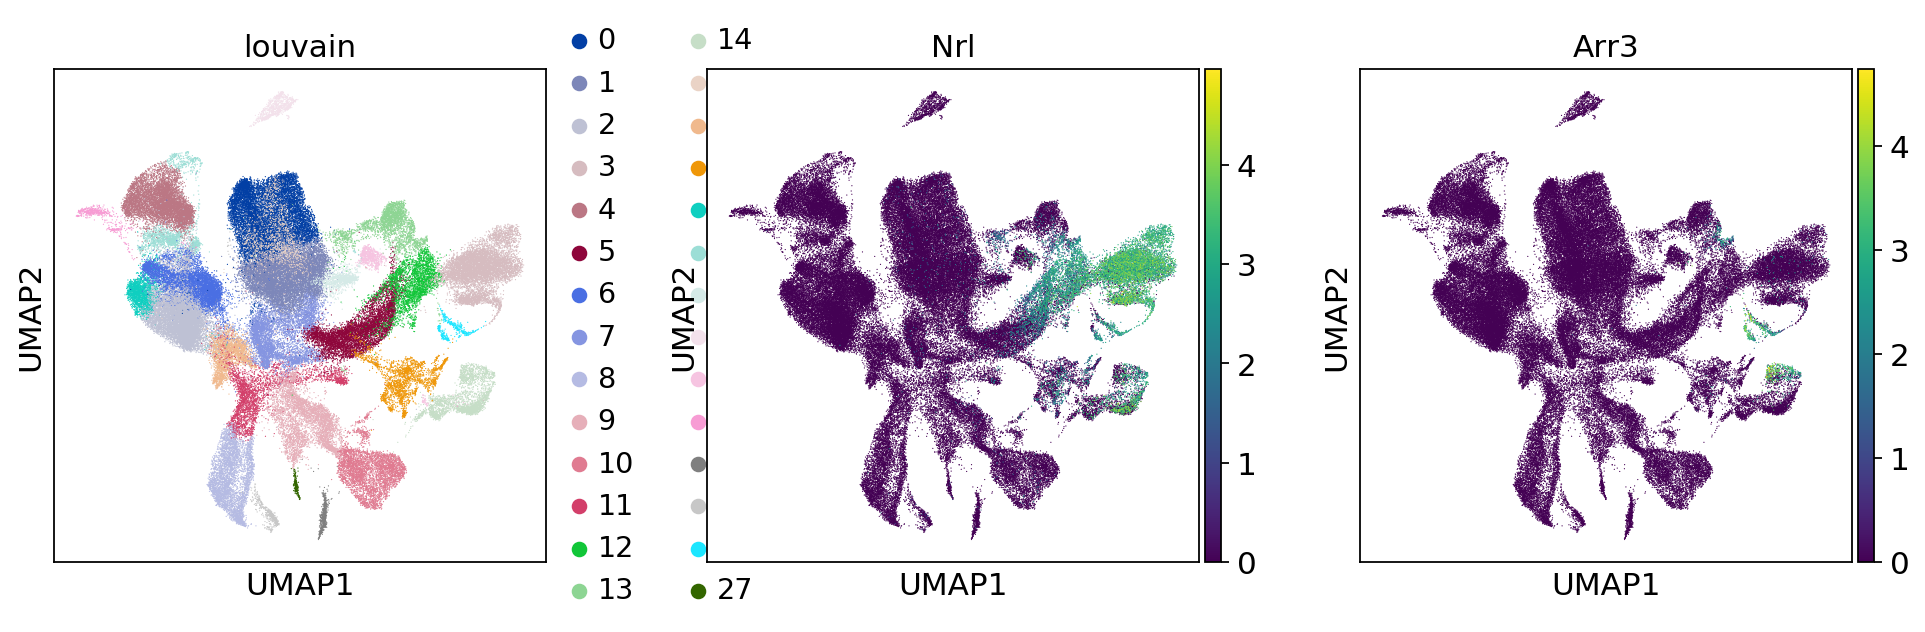

In [53]:
sc.pl.umap(adata, color=['louvain', 'Nrl', 'Arr3'], gene_symbols = "gene_short_name")

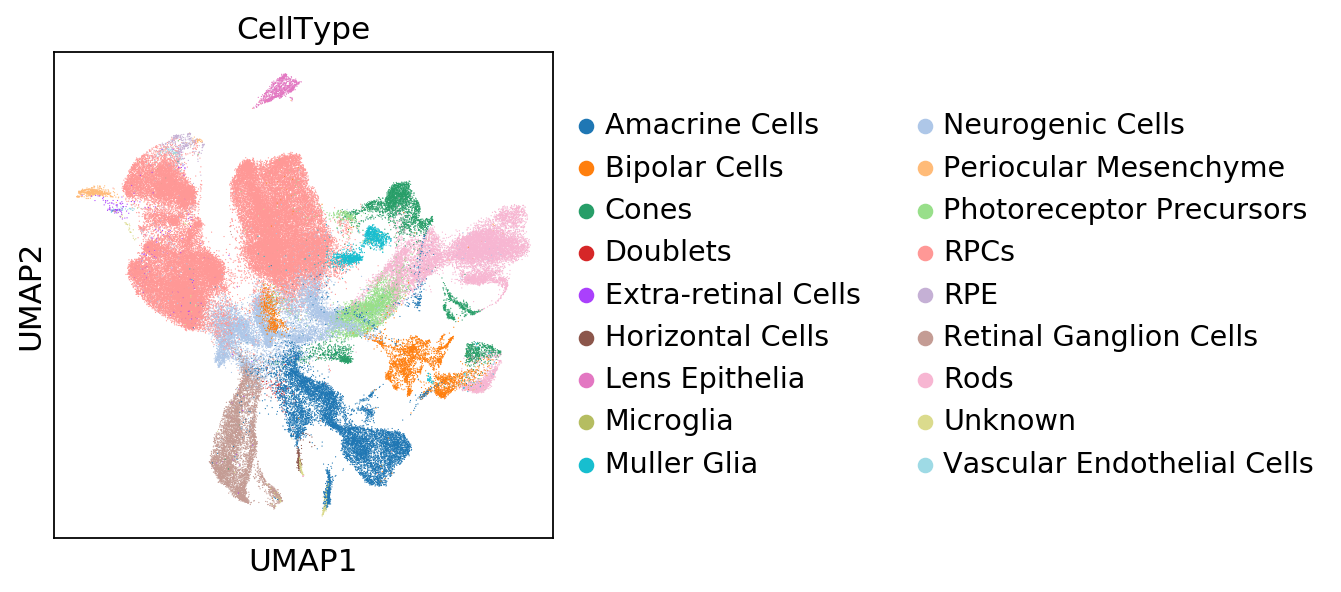

In [54]:
sc.pl.umap(adata, color=['CellType'], gene_symbols = "gene_short_name")

In [55]:
## write adata to h5ad file

In [56]:
processed_adata_path = anndata_dir / "processed_anndata.h5ad"
adata.write_h5ad(processed_adata_path)

In [57]:
## read processed adata from hda5 file

In [58]:
processed_adata_path = anndata_dir / "processed_anndata.h5ad"
adata = anndata.read_h5ad(processed_adata_path)

In [59]:
adata.var.index = adata.var.gene_short_name

In [ ]:
adata.var

In [ ]:
adata.var

In [ ]:
## write adata to loom file

In [ ]:
processed_loom_path = anndata_dir / "processed_anndata.loom"
adata.write_loom(processed_loom_path)

In [ ]:
adata.obs.cell_names = adata.obs.index